In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('/content/Articles.csv')

In [4]:
df.head()

,Date published,Category,Section,Headline,Description,Keywords,Article text
0,2021-07-15 02:46:59,news,world,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","(CNN)Right now, there's a shortage of truck d..."
1,2021-05-12 07:52:09,news,world,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",(CNN)Working in a factory or warehouse can me...
2,2021-06-16 02:51:30,news,asia,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...","(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,2022-03-15 09:57:36,business,investing,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...","investing, Russia is no longer an option for i...","New York (CNN Business)For many years, the wor..."
4,2022-03-15 11:27:02,business,business,Russian energy investment ban part of new EU s...,The European Union formally approved on Tuesda...,"business, Russian energy investment ban part o...",The European Union formally approved on Tuesda...


In [5]:
df['Section'].value_counts()

,count
Section,
sport,1088
europe,800
football,618
uk,376
tennis,197
golf,173
us,134
australia,114
motorsport,100


In [6]:
df['Category'].value_counts()

,count
Category,
sport,2176
news,1611
business,104
politics,75
entertainment,58
health,52


In [7]:
df.shape

(4076, 7)

In [8]:
# Print the article text for index number 104

print(df.loc[104, 'Article text'])

 (Reuters)Seven-times world champion Lewis Hamilton played down his chances of starting the Formula One season with a win and said on Saturday his Mercedes lacked a 'considerable amount' of pace.The season begins in Bahrain next week and Hamilton, hoping to win back the title from Red Bull's Max Verstappen after a controversial end to the 2021 season, took the underdog position."At the moment, I'm sure everyone can figure that out, we are not the quickest," the 37-year-old Briton told reporters on the final day of pre-season testing at the Sakhir circuit."I think Ferrari look to be the quickest and perhaps Red Bull and then maybe us or McLaren. We're currently not at the top."Asked whether he had any concerns about his ability to fight for the championship, Hamilton said it was too early and expressed confidence in his team's proven ability to work through any problems.F1 world champion Max Verstappen signs new deal with Red Bull Racing until 2028Read MoreMercedes have won the last eig

In [9]:
df.isnull().sum()

,0
Date published,0
Category,0
Section,0
Headline,0
Description,0
Keywords,0
Article text,0


In [10]:
#EDA

In [11]:
import seaborn as sns

/tmp/ipython-input-1042749266.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Category'], palette='rainbow')


<Axes: xlabel='count', ylabel='Category'>

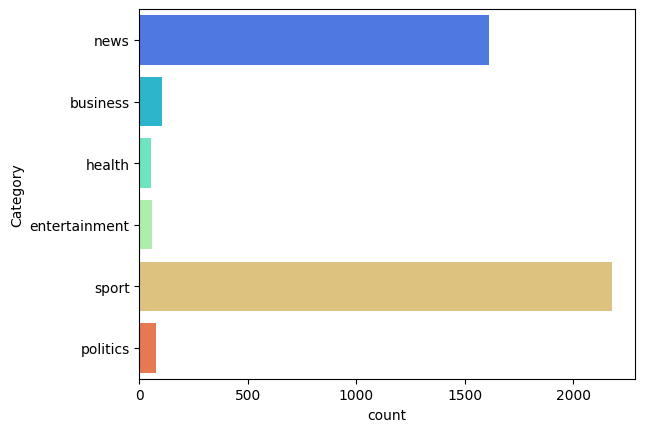

In [12]:
sns.countplot(df['Category'], palette='rainbow')

In [13]:
# Data Preprocessing

# 1. Convert the text to lowercase
# 2. Remove special characters
# 3. Remove extra whitespaces
# 4. Split text into seperate words
# 5. Remove stopwords
# 6. Apply Porter Stemmer on every word (Lemmatization and Stemming)




In [14]:
## Problem Definition
# A growing e-commerce platform specializing in electronic gadgets collects customer feedback from product reviews, surveys, and social media. With a 200% increase in their customer base over three years and a recent 25% spike in feedback volume, their manual review process is no longer sustainable.

# To address this, the company aims to implement an AI-driven solution to automatically classify customer sentiments (positive, negative, or neutral).

# As a Data Scientist, your task is to analyze the provided customer reviews—along with their labeled sentiments—and build a predictive model for sentiment classification.

In [15]:
## text preprocessing

In [16]:
# 1. remove special characters

In [17]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # 1. Convert text to lowercase
    text = text.lower()

    # 2. Remove special characters
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # 4. Split text into separate words
    words = text.split()

    # 5. Remove stopwords
    words = [word for word in words if word not in stop_words]

    # 6. Apply Lemmatization and Stemming
    # First, lemmatize words
    words = [lemmatizer.lemmatize(word, wordnet.VERB) for word in words] # Lemmatize as verbs
    words = [lemmatizer.lemmatize(word) for word in words] # Lemmatize as nouns (default)


    # Then, apply stemming
    words = [stemmer.stem(word) for word in words]

    # Return processed text
    return ' '.join(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [18]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# Apply preprocessing on Article text column (replace 'text_column' with your actual column name)
df['processed_text'] = df['Article text'].astype(str).apply(preprocess_text)

# Show processed data
print("\nProcessed Text Preview:")
print(df[['Article text', 'processed_text']].head())

# Save processed dataset
df.to_csv('processed_reviews.csv', index=False)
print("\nPreprocessed data saved as 'processed_reviews.csv'")


Processed Text Preview:
                                        Article text  \
0   (CNN)Right now, there's a shortage of truck d...   
1   (CNN)Working in a factory or warehouse can me...   
2   (CNN)In a Hong Kong warehouse, a swarm of aut...   
3  New York (CNN Business)For many years, the wor...   
4  The European Union formally approved on Tuesda...   

                                      processed_text  
0  cnnright there shortag truck driver u worldwid...  
1  cnnwork factori warehous mean task repetit lea...  
2  cnnin hong kong warehous swarm autonom robot w...  
3  new york cnn businessfor mani year world popul...  
4  european union formal approv tuesday new barra...  

Preprocessed data saved as 'processed_reviews.csv'


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
# You can adjust parameters like max_features, min_df, max_df, ngram_range
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the processed text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])

# Display the shape of the TF-IDF matrix
print("Shape of TF-IDF matrix:", tfidf_matrix.shape)

# You can also get the feature names (words)
# print("\nFeatures (words):", tfidf_vectorizer.get_feature_names_out())

Shape of TF-IDF matrix: (4076, 5000)


In [21]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer (Bag-of-Words)
# You can adjust parameters like max_features, min_df, max_df, ngram_range
bow_vectorizer = CountVectorizer(max_features=5000)

# Fit and transform the processed text data
bow_matrix = bow_vectorizer.fit_transform(df['processed_text'])

# Display the shape of the Bag-of-Words matrix
print("Shape of Bag-of-Words matrix:", bow_matrix.shape)

# You can also get the feature names (words)
# print("\nFeatures (words):", bow_vectorizer.get_feature_names_out())

Shape of Bag-of-Words matrix: (4076, 5000)


In [22]:
# Install gensim if you haven't already
!pip install gensim

In [23]:
from gensim.models import Word2Vec

# Tokenize the processed text into a list of lists of words
tokenized_text = [text.split() for text in df['processed_text']]



word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4, sg=0)

# You can explore the model, for example, find the most similar words
# print("Most similar words to 'sport':", word2vec_model.wv.most_similar('sport'))

# You can also get the vector for a specific word
# print("Vector for 'sport':", word2vec_model.wv['sport'])

print("Word2Vec model training complete.")

Word2Vec model training complete.


# Task
Perform GloVe text embedding on the processed text data.

## Download pre-trained glove vectors

### Subtask:
Download a pre-trained GloVe model (e.g., from the Stanford website).


**Reasoning**:
Download the GloVe pre-trained vectors file from the Stanford website using `requests`.



In [24]:
import requests
import os

# URL of the GloVe pre-trained vectors file (e.g., 6B.50d.txt)
# You can find other options at: https://nlp.stanford.edu/projects/glove/
glove_url = "https://nlp.stanford.edu/data/glove.6B.zip"
glove_zip_file = "glove.6B.zip"
glove_dir = "glove.6B"

# Download the zip file
print(f"Downloading {glove_url}...")
response = requests.get(glove_url, stream=True)

if response.status_code == 200:
    with open(glove_zip_file, 'wb') as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)
    print("Download complete.")

    # Unzip the file
    import zipfile
    with zipfile.ZipFile(glove_zip_file, 'r') as zip_ref:
        zip_ref.extractall(glove_dir)
    print(f"Extracted to {glove_dir}")

    # Remove the downloaded zip file
    os.remove(glove_zip_file)
    print(f"Removed {glove_zip_file}")
else:
    print(f"Failed to download. Status code: {response.status_code}")


Download complete.
Extracted to glove.6B
Removed glove.6B.zip


## Load glove vectors

### Subtask:
Load the downloaded GloVe vectors into a dictionary or a similar data structure.


**Reasoning**:
Load the downloaded GloVe vectors into a dictionary as instructed.



In [25]:
import numpy as np

# Initialize an empty dictionary to store the GloVe word vectors
glove_vectors = {}

# Specify the path to the GloVe file
glove_file_path = 'glove.6B/glove.6B.50d.txt' # Using the 50d vectors as an example

# Open the GloVe file for reading
with open(glove_file_path, 'r', encoding='utf-8') as f:
    # Iterate through each line of the file
    for line in f:
        # Split the line into the word and its corresponding vector values
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        # Store the word as the key and the vector as the value in the dictionary
        glove_vectors[word] = vector

print(f"Loaded {len(glove_vectors)} GloVe vectors.")

Loaded 400000 GloVe vectors.


## Create document vectors

### Subtask:
For each document in your processed text, create a document vector by averaging the word vectors of the words in the document. Handle words that are not in the GloVe vocabulary.


**Reasoning**:
Iterate through the processed text, split each document into words, find the GloVe vector for each word, average the word vectors to create a document vector, handle words not in the vocabulary by using a zero vector, and finally convert the list of document vectors into a NumPy array.



In [26]:
import numpy as np

# Initialize an empty list to store the document vectors
document_vectors = []

# Determine the dimension of the GloVe vectors
# Assuming all vectors have the same dimension, get the dimension from the first vector
if glove_vectors:
    vector_dimension = len(next(iter(glove_vectors.values())))
else:
    vector_dimension = 0 # Handle case where glove_vectors is empty

# Iterate through each processed text document
for text in df['processed_text']:
    # Split the text into individual words
    words = text.split()

    # Initialize an empty list to store the vectors of words present in the GloVe vocabulary
    word_vectors_in_doc = []

    # Iterate through the words of the document
    for word in words:
        # Check if the word exists in the GloVe vocabulary
        if word in glove_vectors:
            # If found, append its vector to the list
            word_vectors_in_doc.append(glove_vectors[word])

    # Calculate the document vector
    if word_vectors_in_doc:
        # If there are word vectors, calculate their mean
        doc_vector = np.mean(word_vectors_in_doc, axis=0)
    else:
        # If no words were found in the GloVe vocabulary, create a zero vector
        doc_vector = np.zeros(vector_dimension)

    # Append the calculated document vector to the list
    document_vectors.append(doc_vector)

# Convert the list of document vectors into a NumPy array
glove_document_vectors = np.array(document_vectors)

# Print the shape of the resulting document vectors array
print("Shape of GloVe document vectors array:", glove_document_vectors.shape)

Shape of GloVe document vectors array: (4076, 50)


## Prepare data for modeling

### Subtask:
Split the document vectors and the target variable into training and testing sets.


**Reasoning**:
Split the document vectors and the target variable into training and testing sets using train_test_split.



In [27]:
from sklearn.model_selection import train_test_split

# Define the feature matrix X as the glove_document_vectors array
X = glove_document_vectors

# Define the target variable y as the 'Category' column from the DataFrame df
y = df['Category']

# Use the train_test_split function to split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the shapes of the resulting training and testing sets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3057, 50)
Shape of X_test: (1019, 50)
Shape of y_train: (3057,)
Shape of y_test: (1019,)


## Train a classification model

### Subtask:
Train a classification model using the GloVe document vectors as features.


**Reasoning**:
Import LogisticRegression and train the model on the training data.



In [28]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence

# Train the model using the training data
model.fit(X_train, y_train)

print("Logistic Regression model training complete.")

Logistic Regression model training complete.


## Evaluate the model

### Subtask:
Evaluate the performance of the trained model.


**Reasoning**:
Evaluate the performance of the trained model using accuracy, precision, recall, and F1-score on the test set.



In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9480
Precision: 0.9516
Recall: 0.9480
F1-score: 0.9426
